In [324]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import math

%store -r df_prod
%store -r df_geo

In [325]:
df.columns

Index(['wellName', 'lenF', 'effLenF', 'sandF', 'shalySandF', 'calciteF',
       'coalF', 'permF', 'KL', 'KLsand', 'KLshalySand', 'linVolArch',
       'linVolCap', 'RHOB', 'well_comp', 'well_PI_5', 'well_PI_10',
       'well_PI_20', 'well_PI_60', 'well_PI_150'],
      dtype='object')

In [326]:
df = pd.merge(df_geo, df_prod, on='wellName', how='outer')
df = df.drop([58,59,57], axis = 0)
df= df.drop(['derivedFrom', 'Id', 'wellId', 'fileId'], axis = 1)
df = df.replace({'SAS':int(0), 'SSD ICD': int(1), 'AICD': int(2), 'AICV':int(3)})
df = df.astype('float')

In [327]:
PI_5 = 'well_PI_5'
PI_10 = 'well_PI_10'
PI_20 = 'well_PI_20'
PI_60 = 'well_PI_60'
var = 'RHOB'

df[PI_5].describe()

count    57.000000
mean     18.082362
std      18.454415
min       1.234183
25%       6.326380
50%      13.302081
75%      21.274347
max      93.821500
Name: well_PI_5, dtype: float64

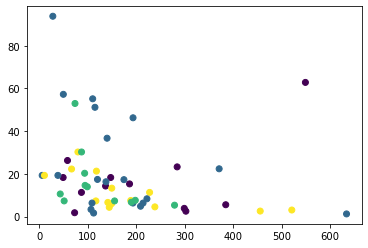

In [328]:
plot = plt.scatter(y=df['PI_5'], x=df[var], c = df['well_comp'])

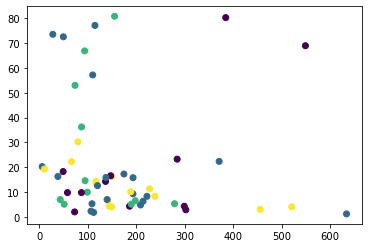

In [329]:
plot = plt.scatter(y=df[PI_10], x=df[var], c = df['well_comp'])

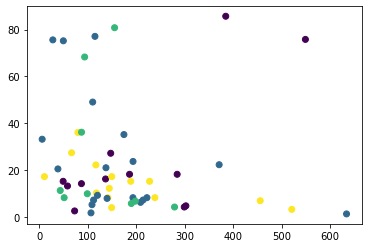

In [330]:
plot = plt.scatter(y=df[PI_20], x=df[var], c = df['well_comp'])

In [331]:
df.at[31, 'well_PI_10'] = np.nan
df.at[31, 'well_PI_20'] = np.nan

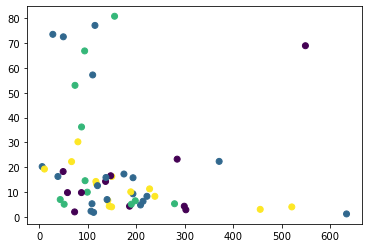

In [332]:
plot = plt.scatter(y=df[PI_10], x=df[var], c = df['well_comp'])

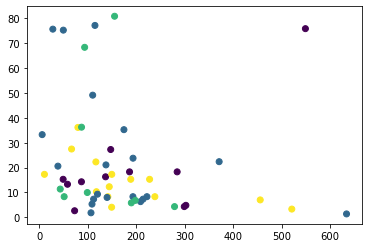

In [333]:
plot = plt.scatter(y=df[PI_20], x=df[var], c = df['well_comp'])

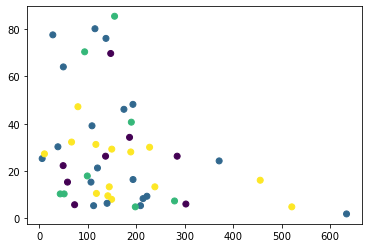

In [334]:
plot = plt.scatter(y=df[PI_60], x=df[var], c = df['well_comp'])

<AxesSubplot:>

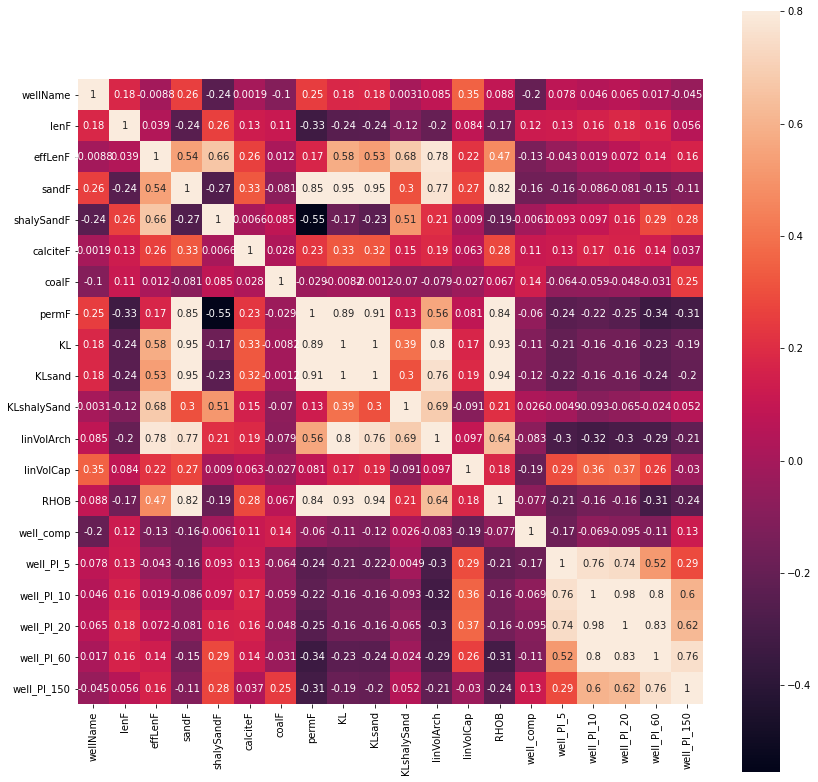

In [335]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax = 0.8, square=True, annot = True)

In [243]:
df

,wellName,lenF,effLenF,sandF,shalySandF,calciteF,coalF,permF,KL,KLsand,KLshalySand,linVolArch,linVolCap,RHOB,well_comp,well_PI_5,well_PI_10,well_PI_20,well_PI_60
0,3.0,1902.9,989.6,115.1,874.5,6.7,0.0,452.7,447995.4,358997.7,88997.7,88.2,112.7,51.2,2.0,5.681821,3.048866,1.234645,0.689586
1,5.0,1998.9,1113.2,266.5,846.7,46.8,16.9,1169.3,1301719.1,1177299.2,124420.0,136.5,165.5,227.6,3.0,0.387020,0.384161,NaN,NaN
2,11026.0,2327.4,1014.4,381.7,632.7,32.0,0.0,1615.8,1639041.2,1450631.3,188409.8,139.4,176.7,284.5,0.0,1.711985,1.763747,1.194283,0.953708
3,11024.0,1261.5,642.9,229.1,413.8,0.0,0.0,939.1,603748.6,539092.0,64656.6,92.5,93.4,49.1,0.0,3.875192,3.875192,4.802510,2.028166
4,11028.0,2026.8,850.2,284.1,566.1,5.1,0.0,1515.3,1288282.8,1127223.6,161059.2,142.9,143.6,136.7,0.0,2.751723,2.138177,2.097997,1.944716
5,11036.0,2103.9,1227.4,269.4,958.0,45.0,0.0,884.7,1085932.8,856059.6,229873.3,195.6,176.6,116.7,3.0,6.343946,6.394170,5.900282,4.841478
6,11032.0,1650.0,1321.4,726.0,595.4,84.7,0.0,2459.8,3250319.4,3017098.6,233220.8,282.2,278.2,521.2,3.0,12.376267,16.783004,15.658296,3.957223
7,11033.0,1875.8,1439.4,529.8,909.6,42.2,0.0,1243.5,1789837.1,1499784.4,290052.7,295.5,239.9,208.9,1.0,7.146338,4.443676,1.564708,2.267060
8,11034.0,1861.1,1527.7,569.6,958.1,104.7,2.0,1401.2,2140641.1,1773608.0,367033.1,284.4,262.8,238.5,3.0,15.386915,15.424071,12.338289,6.278060
9,11035.0,1381.6,929.2,377.6,551.6,7.7,0.0,1690.1,1570439.2,1295123.9,275315.3,199.6,177.5,222.1,1.0,4.955056,3.621717,2.787598,1.885345
